In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set() 
%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

pd.options.display.html.table_schema = True # Data Explorer On!
pd.options.display.max_rows = None # Send all the data! (careful!)

In [2]:
df=pd.read_csv('Financial Planning and Budgeting.csv')

df=df[df.Age!='Under 18']  #remove responses from Under 18 population
df.head(10)

,ID,Datetime,Age,Income,NetWorth,FinancesOnTheMind,Priority,Priority_Other,FinancalPlan_YN,OnTrack,...,Online_Advice_Investopedia,Online_Advice_NW,Online_Advice_CK,Online_Advice_Other,Relationship,Age2,Gender,Household Income,Region,Device Type
0,11393173089,03/04/2020 4:02:09 PM,18-24,"Over $150,000","Under $10,000",Weekly,I am not sure,NaN,No,"No, I am not on track",...,NaN,NaN,NaN,NaN,no need for moneys,18-29,Male,"$200,000+",Mountain,Android Phone / Tablet
1,11393172364,03/04/2020 4:02:09 PM,35-44,"Between $100,000 and $150,000","$100,000 - $249,999",Daily,Save for retirement,NaN,Yes,I am not certain and I am okay with that,...,NaN,NerdWallet,NaN,NaN,Where I can get more returns,45-60,Male,"$125,000-$149,999",South Atlantic,iOS Phone / Tablet
2,11393170678,03/04/2020 4:03:01 PM,18-24,"Under $15,000","Under $10,000",Daily,I am not sure,NaN,No,I do not have a financial plan,...,NaN,NaN,NaN,NaN,Money,18-29,Male,"$0-$9,999",East South Central,iOS Phone / Tablet
3,11393170118,03/04/2020 4:03:59 PM,45-54,"Between $50,000 and $74,999","$100,000 - $249,999",Daily,Save for retirement,NaN,Yes,"Yes, I am on track",...,NaN,NaN,NaN,financial advisor,Not saving enough for retirement,45-60,Male,"$75,000-$99,999",Middle Atlantic,Android Phone / Tablet
4,11393168456,03/04/2020 4:04:00 PM,35-44,"Between $15,000 and $29,999","Under $10,000",Daily,Pay all of my monthly bills,NaN,Yes,"No, I am not on track",...,NaN,NaN,Credit Karma,NaN,that I do not make enough to even be able to p...,30-44,Male,"$10,000-$24,999",West South Central,Android Phone / Tablet
5,11393168334,03/04/2020 4:02:19 PM,35-44,"Over $150,000","Over $500,000",Weekly,Save for retirement,NaN,No,"Yes, I am on track",...,NaN,NaN,NaN,financial advisor,having enough when I retire,30-44,Male,"$150,000-$174,999",Middle Atlantic,Android Phone / Tablet
6,11393168046,03/04/2020 4:04:01 PM,18-24,"Between $15,000 and $29,999","Under $10,000",Daily,Pay all of my monthly bills,NaN,Yes,"Yes, I am on track",...,NaN,NaN,NaN,NaN,Being able to start saving.,18-29,Male,"$10,000-$24,999",South Atlantic,Android Phone / Tablet
7,11393167996,03/04/2020 4:02:09 PM,45-54,"Between $30,000 and $49,999","$50,000 - $99,999",Daily,Manage money during retirement,NaN,Yes,"Yes, I am on track",...,NaN,NaN,Credit Karma,NaN,Unforeseen and unexpected added financial expe...,45-60,Male,"$50,000-$74,999",South Atlantic,iOS Phone / Tablet
8,11393167982,03/04/2020 4:03:56 PM,35-44,"Between $75,000 and $99,999","Over $500,000",Daily,Buy a home,NaN,Yes,"Yes, I am on track",...,NaN,NerdWallet,Credit Karma,NaN,Retirement and college funds when the time com...,30-44,Male,"$50,000-$74,999",West North Central,iOS Phone / Tablet
9,11393167764,03/04/2020 4:02:25 PM,45-54,"Between $75,000 and $99,999","Over $500,000",Monthly,Save for retirement,NaN,No,I am not certain and it concerns me,...,NaN,NaN,NaN,Friends and family,Not sure,45-60,Male,"$0-$9,999",Middle Atlantic,iOS Phone / Tablet


In [3]:
df.columns

Index(['ID', 'Datetime', 'Age', 'Income', 'NetWorth', 'FinancesOnTheMind',
       'Priority', 'Priority_Other', 'FinancalPlan_YN', 'OnTrack',
       'Advisor_Met', 'Advisor_Paid', 'Advisor_Other', 'Adivsor_Outcome',
       'BudgetTools_Spreadsheets', 'BudgetTools_Mint', 'BudgetTools_Clarity',
       'BudgetTools_Stash', 'BudgetTools_DailyBudget', 'BudgetTools_YNAB',
       'BudgetTools_Other', 'BudgetTools_Describe',
       'InvestmentTools_Weathfront', 'InvestmentTools_Betterment',
       'InvestmentTools_Robinhood', 'InvestmentTools_Acorns',
       'InvestmentTools_brokerage', 'InvestmentTools_manager',
       'InvestmentTools_other', 'InvestmentTools_describe', 'Online_Advice',
       'Online_Advice_Google', 'Online_Advice_FB', 'Online_Advice_Reddit',
       'Online_Advice_IG', 'Online_Advice_Bank', 'Online_Advice_Investopedia',
       'Online_Advice_NW', 'Online_Advice_CK', 'Online_Advice_Other',
       'Relationship', 'Age2', 'Gender', 'Household Income', 'Region',
       'Device 

['Age' 'Online_Advice' 'Online_Advice_Google' 'Online_Advice_FB'
 'Online_Advice_Reddit' 'Online_Advice_IG' 'Online_Advice_Bank'
 'Online_Advice_Investopedia' 'Online_Advice_NW' 'Online_Advice_CK'
 'Online_Advice_Other']


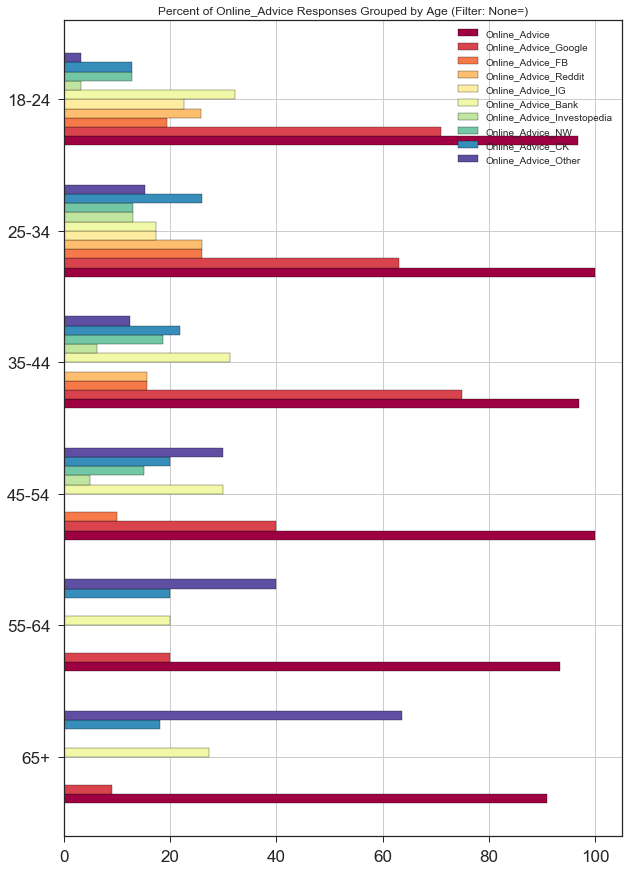

In [13]:
""" USE FOR EXAMINING THE MUTLI-CHOICE ANSWERS AS A FUNCTION OF VARIOUS CONTROLS (AGE, INCOME, ETC)"""

Filterby = 'None'  #eg 'Age', 'None'
Filter = ''        #eg '45-54'
Control_On = 'Age'   #eg Income
Groups ='Online_Advice'   #eg InvestmentTools
column_set= [col for col in df.columns if Groups in col]

if 'None' in Filterby:
    df2=df.copy()
else:
    df2=df[df[Filterby]==Filter]

if 'Describe' in column_set[-1]:
    column_set=column_set[:-1]


column_set= np.append(Control_On,column_set)
print(column_set)

test_grouped = df2[column_set]
test_grouped = test_grouped.groupby([Control_On]).count()

# Count number of responses in each Control On group and normalize
numberofentries=df2[Control_On].value_counts()
test_grouped=test_grouped.div(numberofentries,axis=0)
test_grouped=test_grouped.multiply(100)


test_grouped.sort_index(ascending=False).plot(
    kind='barh',
    figsize=(10, 15),
    cmap='Spectral',
    width=0.7,
    edgecolor='black',
    fontsize=17,
    grid='On',
    #set_xlabel='test',
    title='Percent of ' + Groups + ' Responses Grouped by ' + Control_On + ' (Filter: ' + Filterby + '=' + Filter + ')' 
    ).yaxis.label.set_visible(False)

#ax.set_xlabel('Percent of Responses')

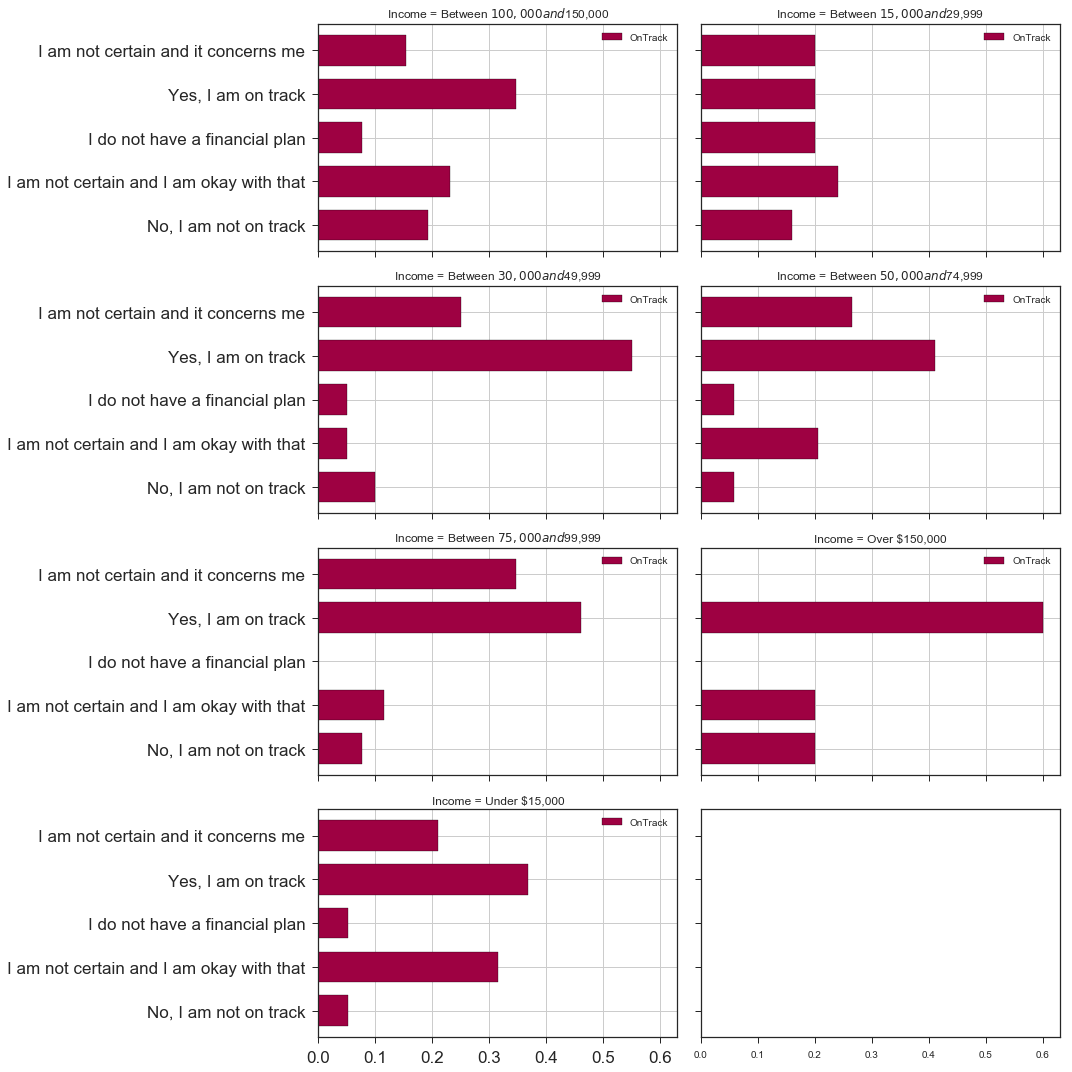

In [11]:

Examine='OnTrack'
examine_unique=df[Examine].unique()

Var='Income'
Filters=np.sort(df[Var].unique())
nplots1 = int((len(Filters)+np.mod(len(Filters),2))/2)

fig, ax = plt.subplots(nplots1,2,sharex=True,sharey=True)
axs=ax.ravel()

Q=0
for Filter in Filters:
    d3=df[df[Var]==Filter].sort_values(Examine)
    
    numberofentries=d3[Examine].value_counts(normalize=True)
    numberofentries=numberofentries.sort_index(ascending=False)
    
    ### Fold in all options so y axes are common
    examine_unique=df[Examine].unique()  #find unique options for variable being examined
    a=pd.DataFrame(np.zeros(len(examine_unique))) #construct a dataframe
    a.index=examine_unique #reindex using the options
    a.columns=[Examine] #rename columns

    #covert numberofentries to dataframe
    b=pd.DataFrame(numberofentries)

    #merge the two on all unique options (a) and fillna with 0
    C=a.merge(b,how='left', left_index=True, right_index=True)
    C=C.iloc[:,[-1]]
    C.columns=[Examine]
    C=C.fillna(0)

    
    # PLOT    
    C.plot(
        ax=(axs[Q]),
        kind='barh',
        figsize=(15, 15),
        cmap='Spectral',
        width=0.7,
        edgecolor='black',
        fontsize=17,
        grid='On',
        #set_xlabel='test',
        title= Var + ' = ' + Filter
        ).yaxis.label.set_visible(False)
        
    Q+=1
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(nplots1,2,sharex=True,sharey=True)
axs=ax.ravel()

C.plot(
    ax=(axs[6]),
    kind='barh',
        figsize=(5, 5),
        cmap='Spectral',
        width=0.7,
        edgecolor='black',
        fontsize=10,
        grid='On',
        #set_xlabel='test',
        title= Var + ' = ' + Filter)

In [ ]:
pd.Series(C)

In [ ]:
df_corr = df[['OnTrack','Age']]
df_corr.OnTrack.value_counts()

In [ ]:
corr_matrix = df_corr.corr(method='spearman')
print(corr_matrix)

fig, ax = plt.subplots(figsize=(8, 6))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between Desired Benefits")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()